In [42]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [2]:
context


KedroContext(
    project_path=WindowsPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly'),
    config_loader=OmegaConfigLoader(conf_source=C:\Users\radix\OneDrive\Escritorio\ET\monopoly\conf, env=None, runtime_params={}, config_patterns={'catalog': ['catalog*', 'catalog*/**', '**/catalog*'], 'parameters': ['parameters*', 'parameters*/**', '**/parameters*'], 'credentials': ['credentials*', 'credentials*/**', '**/credentials*'], 'globals': ['globals.yml']}, base_env=base), default_run_env=local), custom_resolvers=None), merge_strategy={}),
    env=None,
    _package_name=None,
    _hook_manager=<pluggy._manager.PluginManager object at 0x0000020BEAC72350>,
    _extra_params=None
)

In [3]:
catalog


{'monopoly': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/01_raw/Monopoly.parquet'), "
             "protocol='file', load_args={'engine': 'pyarrow'}, save_args={})",
 'monopoly_clean': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/02_intermediate/monopoly_clean.parquet'), "
                   "protocol='file', load_args={}, save_args={})",
 'filtered_data': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/03_primary/filtered_data.parquet'), "
                  "protocol='file', load_args={}, save_args={})",
 'X_test_balanced': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/05_model_input/X_test_balanced.parquet'), "
                    "protocol='file', loa

In [43]:
df=catalog.load("monopoly")
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargamos el dataset desde el catálogo de Kedro
df=catalog.load("monopoly")
df.head()


[12/09/24 02:59:58] INFO     Loading data from monopoly (ParquetDataset)...                     ]8;id=846620;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=114335;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

[12/09/24 03:00:00] INFO     Loading data from monopoly (ParquetDataset)...                     ]8;id=374337;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=490652;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,nan,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


[12/09/24 03:00:09] WARNING  C:\Users\radix\AppData\Local\Temp\ipykernel_2860\3918832242.py:14:     ]8;id=664231;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=653149;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\warnings.py#109\109]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df_filtered['Txs_T12_Group'] = txs_t12_group                                        
                                                                                                                   

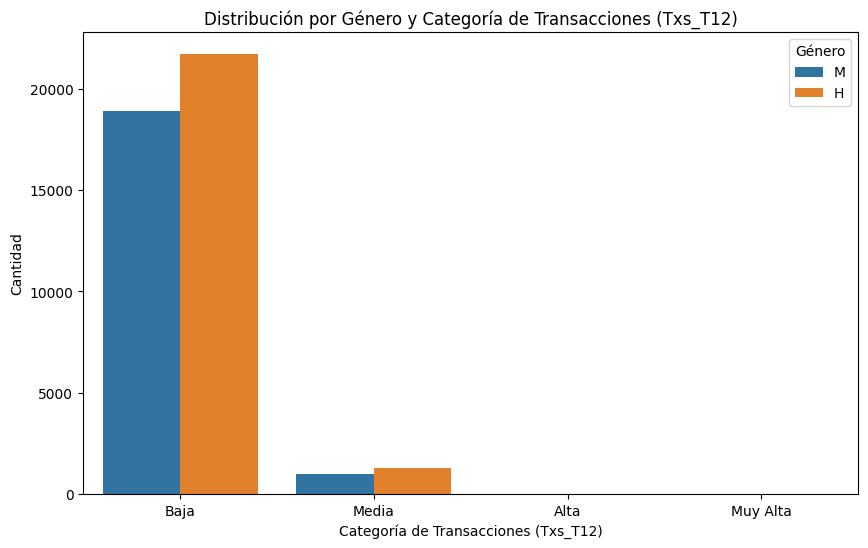

In [44]:
# Filtrar valores nulos en la columna de género y asegurarse de que solo queden "M" y "H"
df_filtered = df[df['Sexo'].isin(['M', 'H'])]

# Crear una copia temporal de la columna 'Txs_T12' y convertirla a numérico sin modificar el dataset original
txs_t12_temp = pd.to_numeric(df_filtered['Txs_T12'], errors='coerce')

# Crear una nueva variable temporal que agrupe Txs_T12 en categorías
# Definir los rangos de las transacciones (ajusta estos valores según el contexto de tus datos)
bins = [0, 10, 50, 100, float('inf')]  # Rango de transacciones
labels = ['Baja', 'Media', 'Alta', 'Muy Alta']  # Etiquetas para cada rango
txs_t12_group = pd.cut(txs_t12_temp, bins=bins, labels=labels, right=False)

# Añadir la columna temporal al dataframe filtrado para usarla en el gráfico
df_filtered['Txs_T12_Group'] = txs_t12_group

# Gráfico de barras para la distribución por género y las transacciones agrupadas
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Txs_T12_Group', hue='Sexo')
plt.title('Distribución por Género y Categoría de Transacciones (Txs_T12)')
plt.xlabel('Categoría de Transacciones (Txs_T12)')
plt.ylabel('Cantidad')
plt.legend(title="Género")
plt.show()



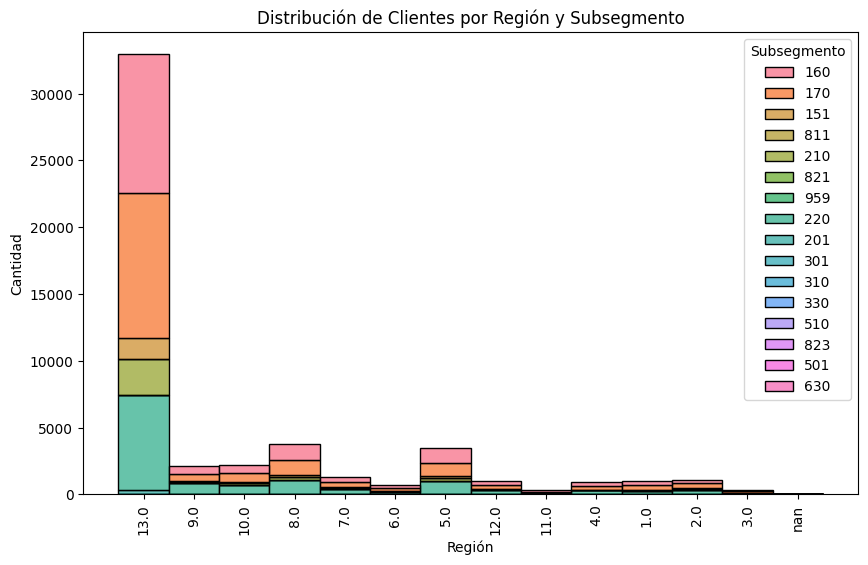

In [45]:
# Gráfico de barras para la distribución por región y subsegmento
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Region', hue='Subsegmento', multiple="stack")
plt.title('Distribución de Clientes por Región y Subsegmento')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()



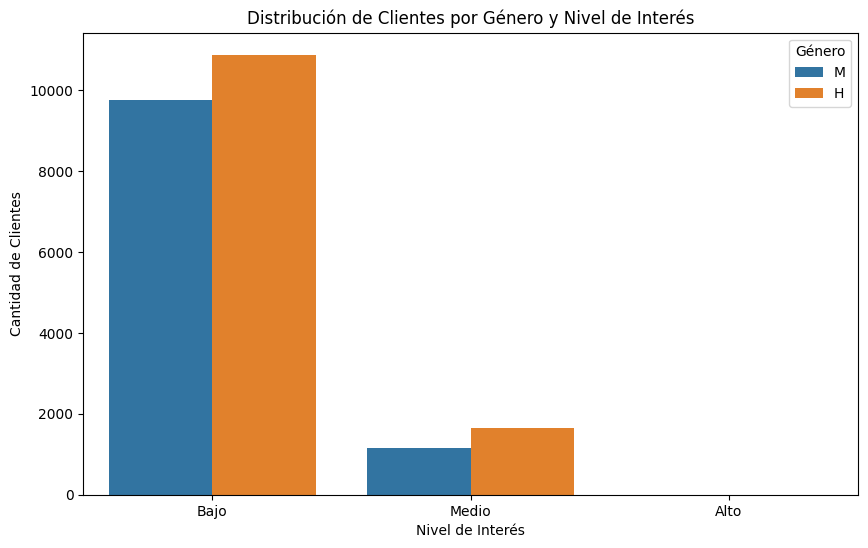

In [46]:
# Definir las columnas de productos financieros
productos_financieros = ['Ctacte', 'Fac_T12', 'Hipotecario', 'Debito']  

# Convertir temporalmente a numérico, reemplazando valores no válidos con 0
df_temp = df[productos_financieros].apply(pd.to_numeric, errors='coerce').fillna(0)

# Crear la columna de nivel de interés
df['Nivel_Interes'] = pd.cut(df_temp.sum(axis=1), bins=[-1, 2, 5, 10], labels=['Bajo', 'Medio', 'Alto'])

# Filtrar para excluir valores NaN en 'Sexo'
df_filtered = df[df['Sexo'].isin(['M', 'H'])]

# Gráfico de barras agrupado por género y nivel de interés
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Nivel_Interes', hue='Sexo')
plt.title('Distribución de Clientes por Género y Nivel de Interés')
plt.xlabel('Nivel de Interés')
plt.ylabel('Cantidad de Clientes')
plt.legend(title="Género")
plt.show()


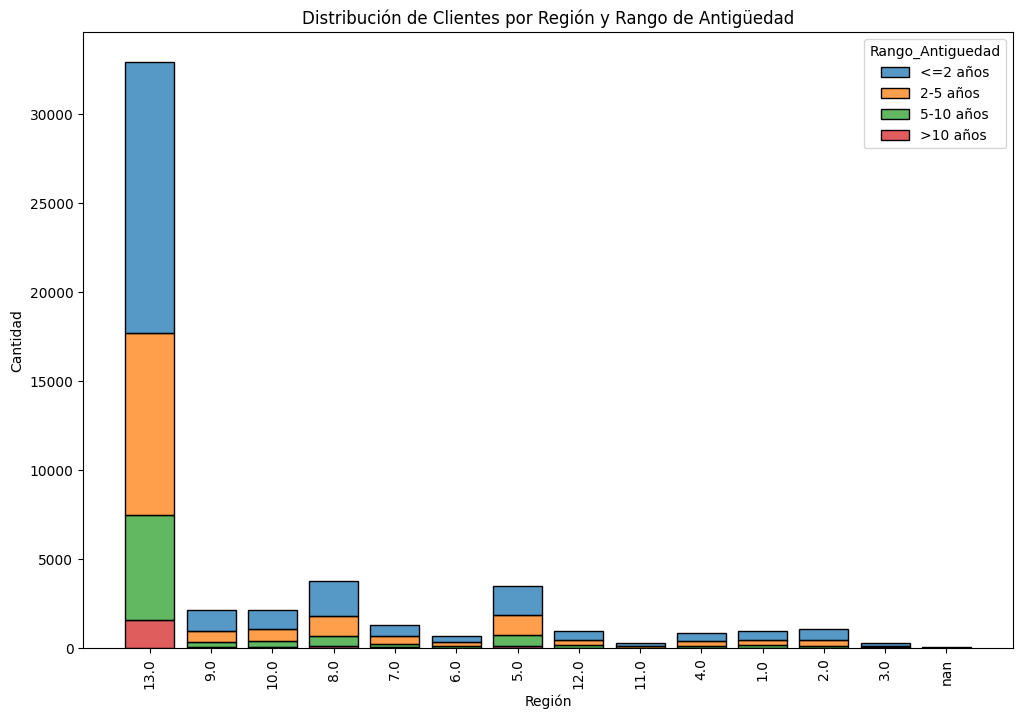

In [47]:
# Asegurar que la columna 'Antiguedad' sea numérica, reemplazando valores no válidos con 0
df['Antiguedad'] = pd.to_numeric(df['Antiguedad'], errors='coerce').fillna(0)

# Categorizar antigüedad en rangos
df['Rango_Antiguedad'] = pd.cut(df['Antiguedad'], bins=[-1, 24, 60, 120, df['Antiguedad'].max()],
                                labels=['<=2 años', '2-5 años', '5-10 años', '>10 años'])

# Gráfico de barras apilado por región y rango de antigüedad
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Region', hue='Rango_Antiguedad', multiple='stack', shrink=0.8)
plt.title('Distribución de Clientes por Región y Rango de Antigüedad')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()


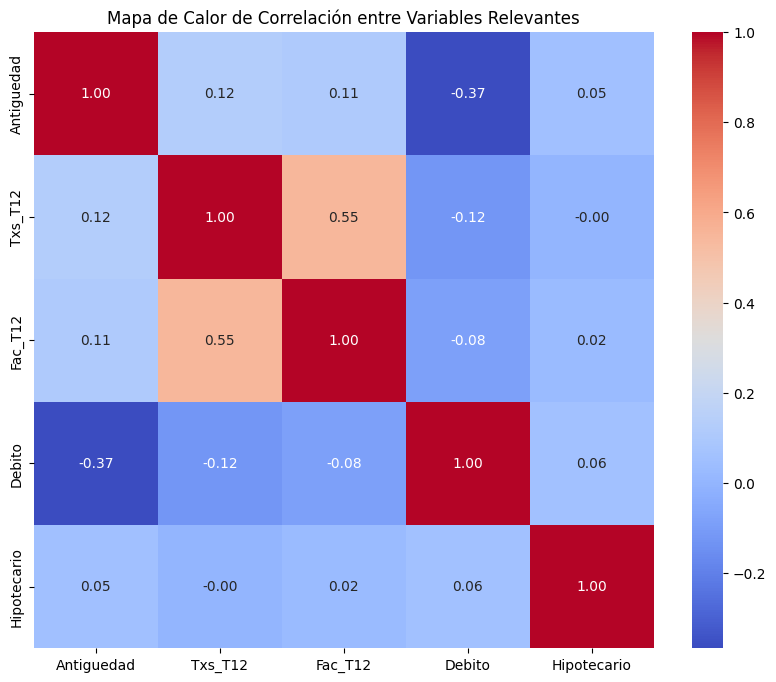

In [48]:
# Seleccionamos las variables numéricas relevantes
variables_numericas = ['Antiguedad', 'Txs_T12', 'Fac_T12', 'Debito', 'Hipotecario']

# Limpiamos el DataFrame eliminando filas con valores nulos en las variables seleccionadas
df_limpio = df[variables_numericas].dropna()

# Generamos la matriz de correlación
correlation_matrix = df_limpio.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Calor de Correlación entre Variables Relevantes')
plt.show()


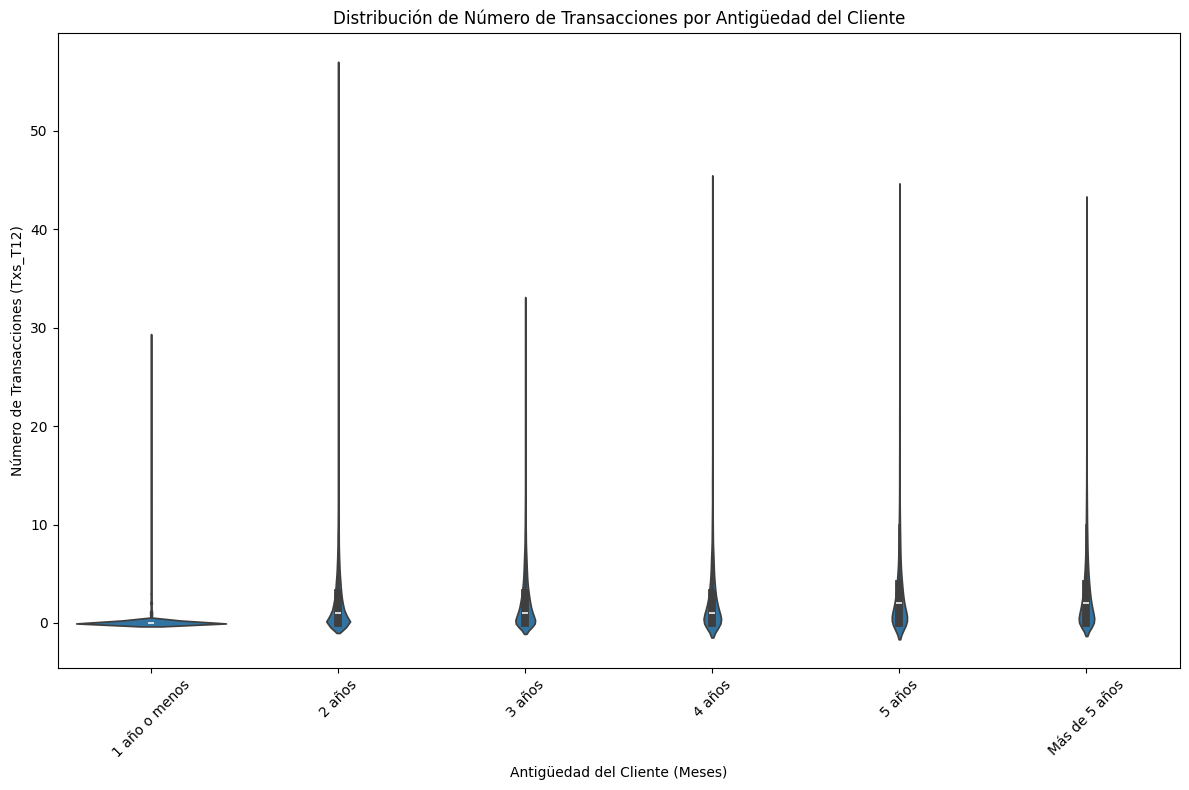

In [55]:
# Crear una copia del dataframe original para evitar alterar los datos
df_cleaned_temp = df.copy()  # Copiar el dataframe original

# Categorizamos la columna 'Antigüedad' en rangos temporales, solo en esta copia
df_cleaned_temp['Antiguedad_Categorized'] = pd.cut(df_cleaned_temp['Antiguedad'], 
                                                   bins=[-np.inf, 12, 24, 36, 48, 60, np.inf], 
                                                   labels=['1 año o menos', '2 años', '3 años', '4 años', '5 años', 'Más de 5 años'])

# Asegurarnos de que 'Txs_T12' sea numérico y reemplazar los valores no válidos con 0
df_cleaned_temp['Txs_T12'] = pd.to_numeric(df_cleaned_temp['Txs_T12'], errors='coerce').fillna(0)

# Reemplazar valores negativos en 'Txs_T12' con 0 solo en la copia temporal
df_cleaned_temp['Txs_T12'] = df_cleaned_temp['Txs_T12'].apply(lambda x: max(x, 0))

# Crear el gráfico de violín para analizar la distribución de transacciones por antigüedad
plt.figure(figsize=(12, 8))  # Definir el tamaño de la figura

# Crear el gráfico de violín con la columna temporal 'Antiguedad_Categorized'
sns.violinplot(x='Antiguedad_Categorized', y='Txs_T12', data=df_cleaned_temp)

# Personalizar el gráfico
plt.title('Distribución de Número de Transacciones por Antigüedad del Cliente')
plt.xlabel('Antigüedad del Cliente (Meses)')
plt.ylabel('Número de Transacciones (Txs_T12)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()


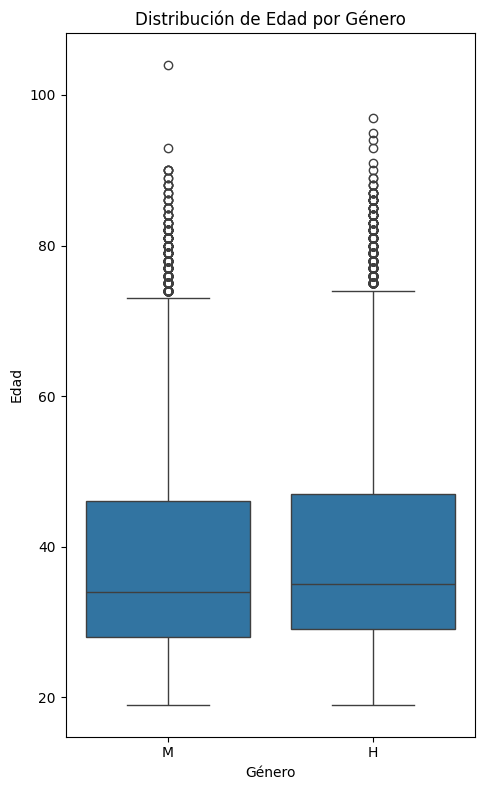

In [58]:
# Crear un dataframe temporal para evitar modificar el dataframe original
df_temp = df[df['Sexo'].isin(['M', 'H'])].copy()

# Asegurarnos de que las variables sean numéricas para el boxplot
df_temp['Edad'] = pd.to_numeric(df_temp['Edad'], errors='coerce')

# Crear el boxplot para visualizar la distribución de estas variables por género
plt.figure(figsize=(14, 8))

# Boxplot para Edad por género
plt.subplot(1, 3, 2)
sns.boxplot(data=df_temp, x='Sexo', y='Edad')
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()
